In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Data/DMG/Assignment2/given_dataset.csv")

In [ ]:
data1=pd.read_csv("/content/drive/My Drive/Data/DMG/Assignment2/to_predict.csv")

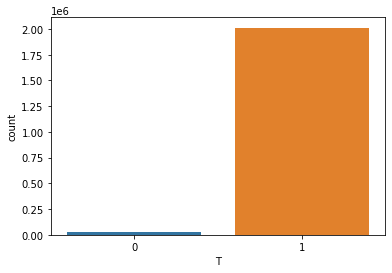

In [ ]:
sns.countplot(x='T',data=data)

In [ ]:
class_label=data['T']
print(Counter(class_label))


Counter({1: 2012677, 0: 29010})


In [ ]:
data=data.drop(['id','T'], axis=1)

In [ ]:
data1=data1.drop(['id'], axis=1)

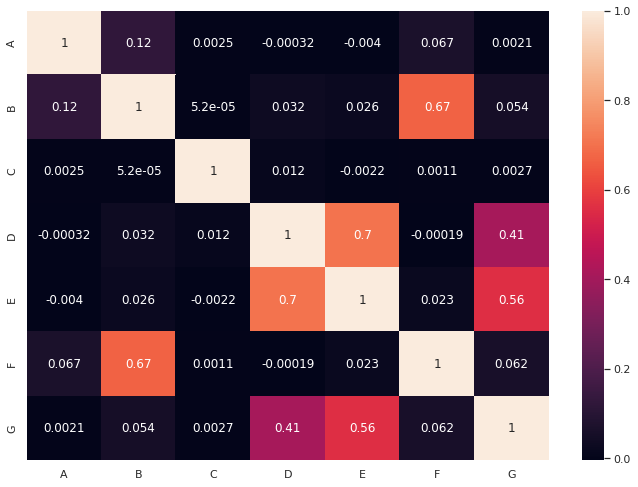

In [ ]:
cor=data.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cor, annot=True)

Counter({0: 29010, 1: 29010})
Counter({0: 29010, 1: 29010})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


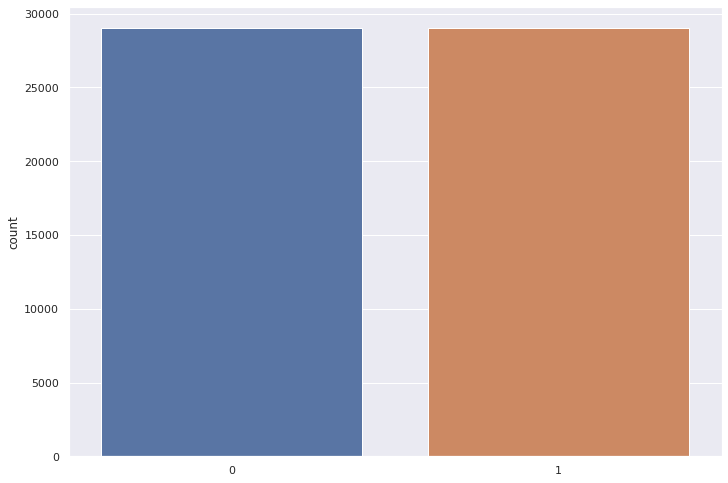

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus=RandomUnderSampler(random_state=41)
X_us,Y_us=rus.fit_sample(data,class_label)
print(Counter(Y_us))
sns.countplot(Y_us)
rus=RandomOverSampler(random_state=41)
X_us1,Y_us1=rus.fit_sample(X_us,Y_us)

print(Counter(Y_us1))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# to_scale=data.values
# scaled_vals= scaler.fit_transform(to_scale)
# x_train2 = pd.DataFrame(scaled_vals)


In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=2, step=10)
# rfe_selector.fit(X_us, Y_us)
# rfe_support = rfe_selector.get_support()
# rfe_feature = data.loc[:,rfe_support].columns.tolist()

In [ ]:
# x_train_new=data[rfe_feature]
# x_train_new

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_us1, Y_us1, test_size=0.1, random_state=42)

In [ ]:
import xgboost as xgb

In [ ]:
# Training on 90% of data
xgb_model = xgb.XGBClassifier(objective="binary:logistic",learning_rate =0.01,
 n_estimators=1400,
 max_depth=14,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
  nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=None, n_estimators=1400, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
# Training on whole data
xgb_model = xgb.XGBClassifier(objective="binary:logistic",learning_rate =0.01,
 n_estimators=1400,
 max_depth=14,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
  nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_model.fit(X_us1, Y_us1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=None, n_estimators=1400, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

clf1 = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_depth=35,max_features=4,random_state=0)
clf4 = RandomForestClassifier(n_jobs=-1,n_estimators=140,max_depth=25,max_features=4,random_state=0)
# clf5 = RandomForestClassifier(n_jobs=-1,n_estimators=180,max_depth=25,max_features=4,random_state=0)
knn = KNeighborsClassifier(n_neighbors=8)
clf9 = BaggingClassifier(base_estimator=clf4,n_estimators=25,random_state=0)
clf10 = BaggingClassifier(base_estimator=clf1,n_estimators=35,random_state=0)
# clf10 = BaggingClassifier(base_estimator=clf4,n_estimators=10,random_state=0)
extra = ExtraTreesClassifier(n_estimators=30, max_depth=25,min_samples_split=2, random_state=0)

# eclf1 = VotingClassifier(estimators=[('crf', clf1), ('clf1', clf4),('knn', knn),('clf9', clf9),('clf10', clf10),('extra', extra)], voting='soft',weights=[1,1,1,1,1,1])
# eclf1.fit(X_train,y_train)

In [ ]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=4)
clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

Counter({1: 2911, 0: 2891})


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


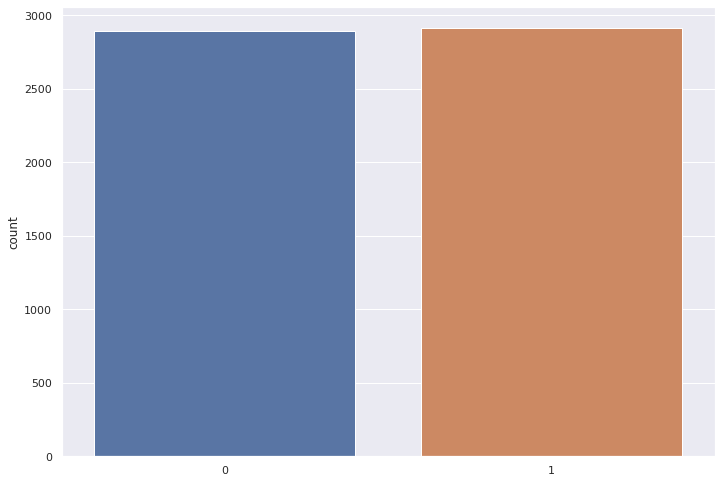

In [ ]:
pred=xgb_model.predict(X_test)
sns.countplot(pred)
print(Counter(pred))


In [ ]:
pred=xgb_model.predict_proba(X_test)

In [ ]:
pred_train=[]
for i in range(0,pred.shape[0]):
  pred_train.append(pred[i][1])

In [ ]:
data1.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

In [ ]:
test_pred=xgb_model.predict_proba(data1)

In [ ]:
pred_test=[]
for i in range(0,test_pred.shape[0]):
  pred_test.append(test_pred[i][1])

In [ ]:
print(list(test_pred).count(1))

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred_train)

In [ ]:
import csv
with open('/content/submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id","T"])
    i=2041687
    for val in pred_test:
        writer.writerow([i,val])
        i+=1


   Train AUCROC Score  n_estimator  Validation AUCROC Score
0            0.885890         1000                  0.88895
1            0.886346         1200                  0.88950
2            0.886346         1400                  0.88950
3            0.886772         1500                  0.88950
4            0.887034         2700                  0.88997


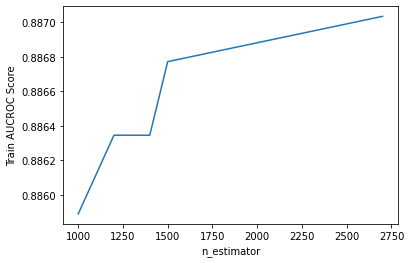

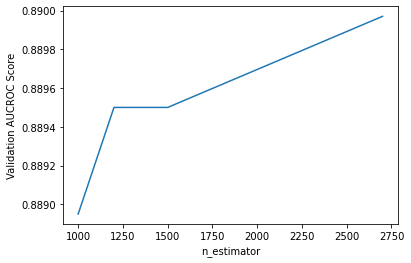

In [ ]:
# Train/ Test Accu

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_estimators=[1000,1200,1400,1500,2700]
train_sc=[0.88588955429572,0.8863458423189793,0.8863458423189793,0.8867718893781971,0.887034195579068]
test_sc=[0.88895, 0.88950,0.88950,0.88950,0.88997]
dict_ = {'Train AUCROC Score': train_sc,'n_estimator':n_estimators,'Validation AUCROC Score':test_sc,}  
# data_list=[n_estimators,train_sc,test_sc]
# print(data_list)
data=pd.DataFrame(dict_)
print(data)

# sns.lineplot(data=data )
sns.lineplot(data=data, x='n_estimator',y='Train AUCROC Score' )
plt.show()
sns.lineplot(data=data, x='n_estimator',y='Validation AUCROC Score' )
